###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 M.Z. Jorisch

<h1 align="center">Orbital Perturbations</h1>

In this lesson, we will discuss the orbits of spacecraft and planets, and how those orbits can be affected by another body flying by.  We will look at Encke's method, which was created by _____ in _____, and uses an ODE to describe the "new" orbit of a body when affected by the pull of an additional body flying by.

In traditional dynamics, the standard two body problem is used to describe two bodies in motion with one orbiting the other.  This fails to take into account the affect of outside bodies on the orbit and can produce an orbit very different than the "true" orbit.

These orbits play a large role in our daily lives.  There are numerous satelittes currently orbiting Earth as we speak, which are used for communications, GPS, as well as other data grabbers.  These satelittes can have slight changes to their orbits around Earth caused by other satelittes and need to be taken into consideration when designing orbital parameters for them.

We will look at both the traditional two body motion and compare it to Encke's method and see how much the orbits vary over time.

<h2 align="center">Encke's Method</h2> 

![Screen Shot 2015-12-01 at 10.42.54 AM](./Figures/Screen Shot 2015-12-01 at 10.42.54 AM.png)
<h4 align="center">Figure 1. Visualization of Encke's Method ([Analytical Mechanics of Aerospace Systems Pg 342](http://www.control.aau.dk/~jan/undervisning/MechanicsI/mechsys/chapter10.pdf))</h4>

Encke's method describes the difference between the standard Keplerian orbit and a perturbed orbit which is affected by the flyby of a third body.  Johann Franz Encke came up with this method in 1851.  The method is based on the equations of the two orbits.

The Keplerian orbit or the osculating orbit is represented by the equation:

$$\frac{d^2 \vec{r}_{osc}}{dt^2} = - \frac{\mu}{r^3 _{osc}} \vec{r}_{osc}$$

The perturbed orbit is represented by a similar equation:

$$\frac{d^2 \vec{r}}{dt^2} = - \frac{\mu}{r^3} \vec{r} + \vec{a}_d$$

When looking at the two equations, the only difference between the osculating orbit and the perturbed orbit is the term $\vec{a}_d$, which is the acceleration vector caused by the third body flyby.

The acceleration vector can be found using the following:

$$\vec{a}_d = \frac{1}{m_2} \vec{f}_{d_2} - \frac{1}{m_1} \vec{f}_{d_1}$$

The two accelerations cancel out many times. (Reference)

This leads to: 

$$\vec{a}_d = \frac{1}{m_2} \frac{G m_2 m_3}{|\vec{r}_23|^3} \vec{r}_23 - \frac{1}{m_1} \frac{G m_1 m_3}{|\vec{r}_13|^3} \vec{r}_13$$

Where $m_1$ is the mass of central body, $m_2$ is the mass of the body orbiting around $m_1$, and $m_3$ is the mass of the disturbing body

Initially, at time $t_0 = 0$, the osculating orbit and perturbed are equal.  The change occurs at a time $t = t_0 + \Delta t$.

Let's define the difference between the radius of the osculating and perturbed obit as $\delta$ and the difference between the velocities of the two orbits as $\gamma$

Therefore at time $t$ which we just defined, the radial and velocity components are:

$$\vec{\delta}(t) = \vec{r}(t) - \vec{r}_{osc} (t)$$
$$\vec{\gamma}(t) = \vec{v}(t) - \vec{v}_{osc} (t)$$

We have some initial conditions as well.  As mentioned before the obrbits are equal at $t_0$ which gives us $\vec{\delta} (t_0) = 0$.  The velocity difference at $t_0$ is also zero. $\frac{d \vec{\delta} (t_0)}{dt} = \vec{\gamma} (t_0) = 0$

If we subtract our two initial equations we get:

$$\frac{d^2 \vec{\delta}}{dt^2} = \vec{a}_d + \mu \left( \frac{\vec{r}_{osc}}{r_{osc} ^3} + \frac{\vec{r}}{r^3} \right)$$

This can be simiplied to:

$$\frac{d^2 \vec{\delta}}{dt^2} + \frac{\mu}{r_{osc} ^3} \vec{\delta} = \frac{\mu}{r_{osc} ^3} \left( 1 - \frac{r_{osc} ^3}{r^3} \right) \vec{r} + \vec{a}_d$$

Our term $1 - \frac{r_{osc} ^3}{r^3}$ can be an issue due to the fact that at the beginning of flight $r_{osc}$ and $r$ are basically equal. That can't be too good, can it?

Luckily we have a way to fix this!

$$1 - \frac{r_{osc} ^3}{r^3} = -B \frac{3 + 3B + B^2}{1 + (1 + B) ^{\frac{3}{2}}}$$
Where $$B = \frac{\vec{\delta} (\vec{\delta} - 2 \vec{r})}{r^2}$$

We can find the radial and velocity components using the initial values of the radius and velocity along with the Legrangian coefficients in terms of the eccentric anomaly $E$

$$\vec{r} = F \vec{r}_0 + G \vec{v}_0$$
$$\vec{v} = \dot{F} \vec{r}_0 + \dot{G} \vec{v}_0$$

Where

$$F = 1 + \frac{a}{r_0} \left[ cos(E - E_0) - 1 \right]$$
$$G = \frac{a \alpha _0}{\mu} \left[ 1 - cos(E - E_0) \right] + r_0 \sqrt{\frac{a}{\mu}} sin(E - E_0)$$
$$\dot{F} = - \frac{\sqrt{\mu a}}{r r_0} sin(E - E_0)$$
$$\dot{G} = 1 + \frac{a}{r} \left[ cos(E - E_0) - 1 \right]$$

The eccentric anomaly $E$ is equal to $M + e sin(E)$.  $M$ is the mean anomaly and $e$ is the eccentricity.

In [1]:
from matplotlib import pyplot
import numpy
from numpy import linalg
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
def Kepler_eqn(e, M):
    """Takes the eccentricity and mean anomaly of an orbit to solve Kepler's equation
    
    Parameters:
    ----------
        e : float
            eccentricity of orbit
        M : float
            Mean anomaly of orbit
        
    Returns:
    -------
        E : float
            Eccentric anomaly
    """
    
    E = M + e * numpy.sin(M) # eccentric anomoaly
    fofE = E - e * numpy.sin(E) - M #eccentric anomaly as a function of E
    fdotE = 1 - e * numpy.cos(E) #derivative with respect to E of fofE
    dE = - fofE / fdotE # change in E
    Enew = E + dE
    tolerance = 1e-2
    
    while abs(fofE) > tolerance:
        E = M + e * numpy.sin(Enew)
        fofE = E - numpy.sin(E) - M
        fdotE = 1 - e * numpy.cos(E)
        dE = - fofE / fdotE
        Enew = E + dE
    
    return E
    
    #Based off of code from Ashish Tewari

In [3]:
def ellip_orb(a, Period, mu, e, t0, r0, v0, t):
    
    """Calculates the orbital position for an elliptical orbit
    
    Parameters:
    ----------
    
    a  : float
        Semi-major axis
    Period : float
        Period of planetary orbit
    mu : float
        Gravitational parameter
    t0 : float
        Initial time t = 0
    r0 : array of float
        Initial positional array
    v0 : array of float
        Initial velocity array
    t : float
        time
    
    Returns:
    -------
    
    r : array of float
        Array of radius at each time t
    v : array of float
        Array of velocity at each time t
    """
    
    r0_norm = numpy.linalg.norm(r0) #normalized version of initial radius
    
    v0_norm = numpy.linalg.norm(v0) #normalized version of initial velocity
    
    alpha = r0 * v0 # constant
    
    v0_t = numpy.transpose(v0)
    
    H = numpy.cross(r0, v0_t) # angular momentum
    
    H_norm = numpy.linalg.norm(H)

    p = (H_norm * H_norm) / mu # constant which is related to a -> p = a (1 - e ^ 2)
    
    etheta0 = p / r0_norm - 1 # eccentricity at theta = 0 aka the periapsis
    
    theta0 = numpy.pi
            
    n = 2 * numpy.pi / (Period) # n given the period

    E0 = 2 * numpy.arctan(numpy.sqrt((1 - e) / (1 + e)) * numpy.tan(0.5 * theta0))
    
    tau = t0 + (- E0 + e * numpy.sin(E0)) / n # found from time since perigee

    M = n * (t - tau) # mean anomaly

    E = Kepler_eqn(e, M)
    
    r_leg = a * (1 - e * numpy.cos(E)) # radius for legrangian coefficients
    
    F = 1 + a * (numpy.cos(E - E0) - 1) * r0_norm
    
    G = a * alpha * (1 - numpy.cos(E - E0)) / mu + r0_norm * numpy.sqrt(a / mu) * numpy.sin(E - E0)
    
    F_dot = - numpy.sqrt(mu * a) * (numpy.sin(E - E0)) / (r_leg * r0_norm)
    
    G_dot = 1 + a * (numpy.cos(E - E0) - 1) / r_leg
    
    r = numpy.zeros_like(r0)
    v = numpy.zeros_like(v0)
    
    
    r = F * r0 + G * v0
    v = F_dot * r0 + G_dot * v0
    
    return r, v

    #Based off of code by Ashish Tewari

In [4]:
def acceleration_d(m1, m2, m3, r, r3):
    
    """Calculates the acceleration due to the disturbing orbit
    
    Parameters:
    ----------
    m1 : float
        Mass of central body
    m2 : float
        Mass of second body
    m3 : float
        Mass of third (disturbing) body
    r : array of float
        Radial distance between body two and one
    r3: array of float
        Radial distance between body three and one
        
    Returns:
    -------
    a_d : array of float
        Acceleration due to the disturbing orbit
    """
    a_d = numpy.zeros((2, 1))
    
    G = 6.674e-11 # Gravitational constant
    
    r13 = r3
    
    r23 = r - r3
    
    r23_norm = numpy.linalg.norm(r23)
    
    r13_norm = numpy.linalg.norm(r13)
    
    a_d = (((1 / m2) * ((G* m2 * m3)/ (r23_norm ** 3))) * r23) - (((1 / m1) * ((G * m1 * m3) / (r13_norm ** 3))) * r13)
    
    return a_d

### Initial Conditions

In [11]:
mu3 = 1.2669e17                  # Standard gravitational parameter of Jupiter in m^3 / s^2
m3 = 1.8983e27                   # Mass of Jupiter in kg
e3 = .0489                       # Eccentricity of Jupiter
a3 = 778000000.                  # Semi-major Axis of Jupiter in km
Period3 = 4332.589 * 3600 * 24   # Period of Jupiter Orbit in seconds

mu = 4.2828e13                   # Standard gravitational parameter of Mars in m^3 / s^2
m2 = 6.4174e23                   # Mass of Mars in kg
e = .0934                        # Eccentricity of Mars
a = 228000000.                   # Semi-major Axis of Mars in km
Period = 686.980 * 3600 * 24     # Period of Mars Orbit in seconds

mu1 = 1.3271e20                  # Standard gravitational parameters of the Sun in m^3 / s^2
m1 = 1.989e30                    # Mass of the Sun in kg

dt = 24 * 3600                   # Time step
tfinal = 4000 * dt               # Final time
N = int(tfinal / dt) + 1         # Number of time steps

t = numpy.linspace(0,tfinal,N)
r0 = numpy.array([228000000., 0.])
v0 = numpy.array([-21.84, -10.27])
r3_0 = numpy.array([778000000., 0.])
v3_0 = numpy.array([-13.04, -.713])
r = numpy.empty((N, 2))
v = numpy.empty((N, 2))
gamma =  numpy.empty((N, 2))
delta = numpy.empty((N, 2))
r_n = numpy.empty((N, 2))
v_n = numpy.empty((N, 2))
a_d = numpy.empty((N, 2))
r_osc = numpy.empty((N, 2))
r_osc_n = numpy.empty((N, 2))
v_osc = numpy.empty((N, 2))
v_osc_n = numpy.empty((N, 2))
r3_n = numpy.empty((N, 2))


for i,ts in enumerate(t):
    delta = numpy.zeros_like(r0)
    gamma = numpy.zeros_like(r0)
    r_osc, v_osc = ellip_orb(a, Period, mu1, e, t[0], r0, v0, ts) # Trajectory of the osculating orbit of Mars
    r_osc_norm = numpy.linalg.norm(r_osc) # Normalized osculating orbit of Mars
    r0_norm = numpy.linalg.norm(r0) # Normalized initial orbit of Mars
    r3, v3 = ellip_orb(a3, Period3, mu3, e3, t[0], r3_0, v3_0, ts) # Trajectory of Jupiter
    a_d = acceleration_d(m1, m2, m3, r_osc, r3) # Acceleration due to Jupiter
    gamma = mu3 * (dt) * ((1 - (r_osc_norm / r0_norm) ** 3) / r_osc_norm ** 3) + a_d * (dt) # Difference in velocity between osculating orbit and perturbed
    delta = gamma * (dt) # Difference between osculating orbit and perturbed orbit radius
    r = r_osc + delta # Perturbed orbital radius
    v = v_osc + gamma # Perturbed orbital velocity
    r_osc_n[i,:] = r_osc # Value of osculating orbital radius for every time step
    v_osc_n[i,:] = v_osc # Value of osculating orbital velocity for every time step
    r3_n[i,:] = r3 # Value of Jupiter's radius for every time step
    r_n[i,:] = r # Value of the perturbed orbital radius for every time step
    v_n[i,:] = v # Value of the perturbed orbital velocity for every time step
    

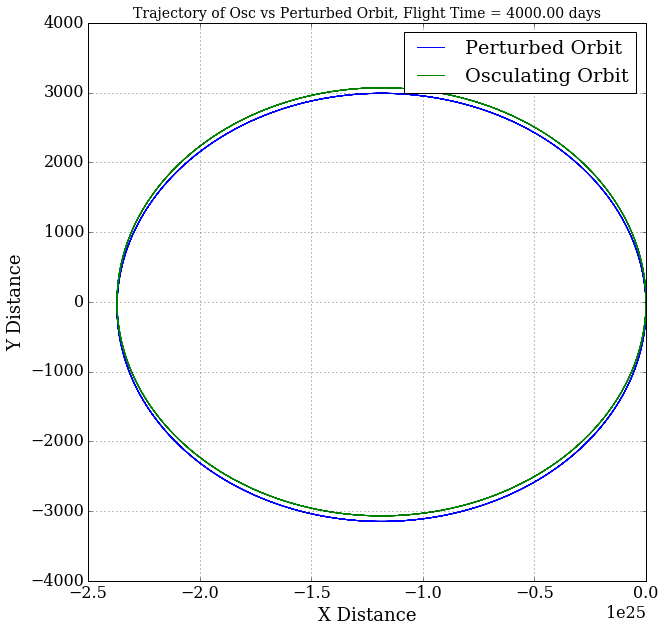

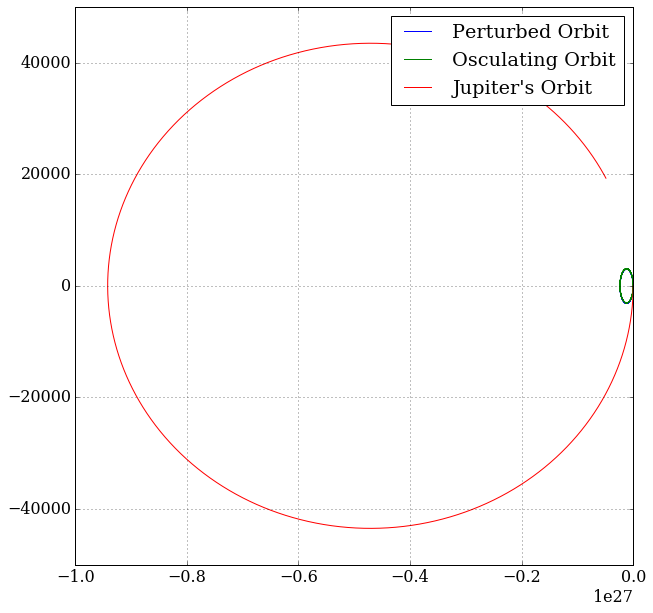

In [23]:
x = numpy.linspace(t[0], t[-1], N)
pyplot.figure(figsize = (10,10))
pyplot.grid(True)
pyplot.xlabel(r'X Distance', fontsize = 18)
pyplot.ylabel(r'Y Distance', fontsize = 18)
pyplot.title('Trajectory of Osc vs Perturbed Orbit, Flight Time = %.2f days' %(tfinal / dt), fontsize=14)
pyplot.plot(r_n[:,0], r_n[:,1])
pyplot.plot(r_osc_n[:,0], r_osc_n[:,1])
pyplot.legend(['Perturbed Orbit', 'Osculating Orbit']);

pyplot.figure(figsize = (10,10))
pyplot.grid(True)
pyplot.plot(r_n[:,0], r_n[:,1])
pyplot.plot(r_osc_n[:,0], r_osc_n[:,1])
pyplot.plot(r3_n[:,0], r3_n[:,1])
pyplot.legend(['Perturbed Orbit', 'Osculating Orbit', 'Jupiter\'s Orbit']);

In [9]:
# from IPython.core.display import HTML
# css_file = '../numericalmoocstyle.css'
# HTML(open(css_file, "r").read())